In [1]:
import numpy as np
from modulations import BPSK
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Sampling rate
fs = 18e3
# Symbol Rate
fsym = 2e3
# Sampling Period (sec)
Ts = 1/fs
# Symbol Duration (sec)
Tsys = 1/fsym

# Upsample Factor 
L = int(np.ceil(Tsys/Ts))

In [3]:
# --- Raised Cosine filter
beta = 0.35 # roll-factor
nTaps = 61 # Number of taps
t = np.arange(-int(nTaps-1)/2, int(nTaps-1)/2 + 1) * Ts

h = 1/Tsys*np.sinc(t/Tsys) * np.cos(np.pi*beta*t/Tsys) / (1 - (2*beta*t/Tsys)**2)

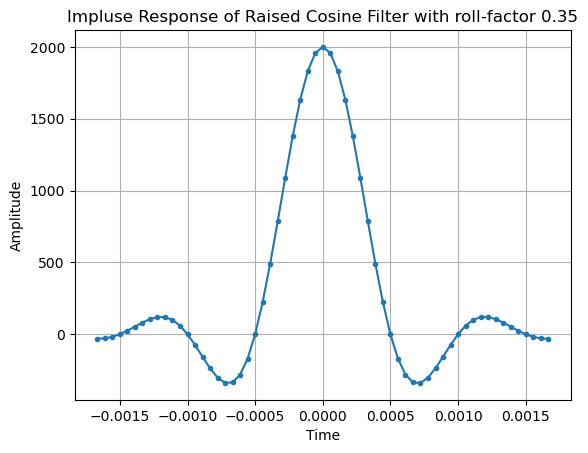

In [4]:
plt.plot(t, h, '.-')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Impluse Response of Raised Cosine Filter with roll-factor ' + str(beta))
plt.grid()
plt.show()

In [5]:
# Generate Bits at random
nBits = 10
bits = np.random.randint(0, 2, nBits)

# Modulate them using BPSK
symbols = BPSK(bits)
print('Symbols : '+str(symbols))

# Upsample symbols
upSymbols = np.zeros(L*nBits)
upSymbols[np.arange(0, L*nBits, L)] = symbols

# Apply Filter
x = np.convolve(upSymbols, h)

Symbols : [ 1. -1.  1. -1. -1.  1.  1. -1.  1. -1.]


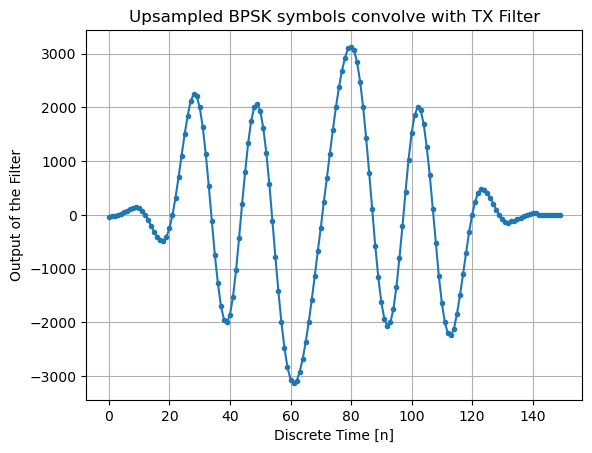

In [6]:
plt.plot(x, '.-')
plt.xlabel('Discrete Time [n]')
plt.ylabel('Output of the Filter')
plt.title('Upsampled BPSK symbols convolve with TX Filter')
plt.grid()